In [1]:
import pandas as pd

In [2]:
df= pd.read_csv('C:\\Users\\Sunny\\Desktop\\Technocolabs\\Data Science Final project\\Final Project\\Train.csv')
df2 = pd.read_csv('C:\\Users\\Sunny\\Desktop\\Technocolabs\\Data Science Final project\\Final Project\\Test.csv')
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [3]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [4]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [5]:
df.shape

(8523, 12)

In [6]:
df2.shape

(5681, 11)

In [7]:
import seaborn as sns

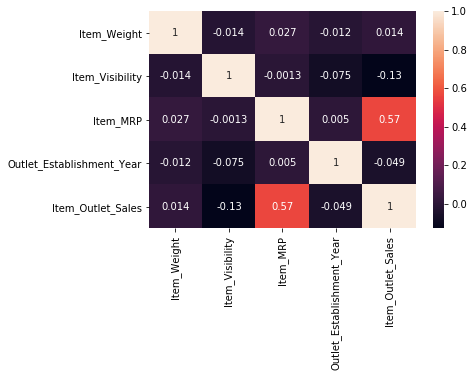

In [8]:
sns.heatmap(df.corr(), annot= True)

In [9]:
df.Item_Weight.fillna(df.Item_Weight.mean(),inplace=True)
df.Outlet_Size.fillna(df.Outlet_Size.mode()[0],inplace=True)
df2.Item_Weight.fillna(df.Item_Weight.mean(),inplace=True)
df2.Outlet_Size.fillna(df.Outlet_Size.mode()[0],inplace=True)

In [10]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


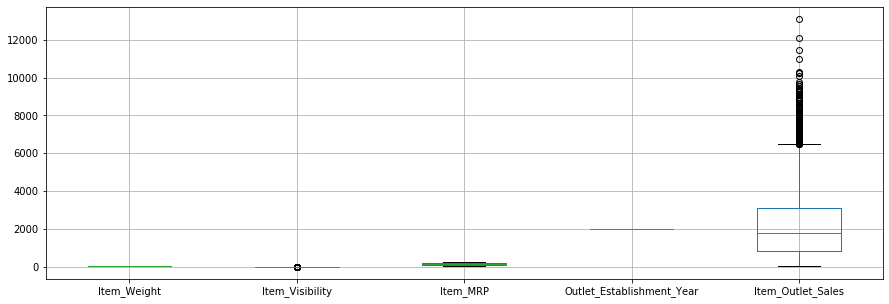

In [11]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,5))
df.boxplot()

In [12]:
from sklearn.preprocessing import LabelEncoder
df.select_dtypes(include='object').columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [13]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [14]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 <a list of 16 Text xticklabel objects>)

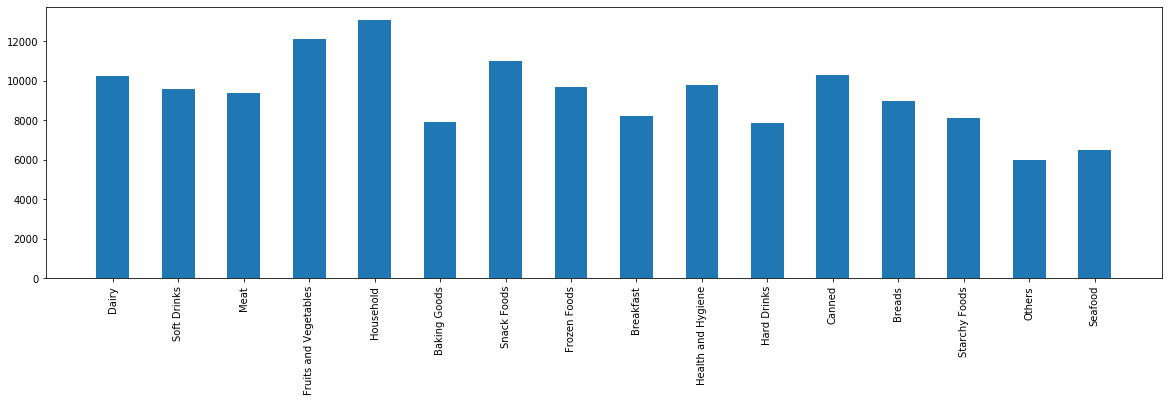

In [15]:
plt.figure(figsize=(20,5))
plt.bar(df['Item_Type'], df['Item_Outlet_Sales'],width=0.5)
plt.xticks(rotation='vertical')

In [16]:
df['Item_Identifier'].value_counts()
df['Item_Identifier'] = df['Item_Identifier'].apply(lambda x: x[0:2])
df['Item_Identifier'] = df['Item_Identifier'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
df['Item_Identifier'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Identifier, dtype: int64

In [17]:
df2['Item_Identifier'].value_counts()
df2['Item_Identifier'] = df2['Item_Identifier'].apply(lambda x: x[0:2])
df2['Item_Identifier'] = df2['Item_Identifier'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
df2['Item_Identifier'].value_counts()

Food              4076
Non-Consumable    1087
Drinks             518
Name: Item_Identifier, dtype: int64

In [18]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,Food,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,Drinks,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,Food,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,Food,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,Non-Consumable,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


<BarContainer object of 3 artists>

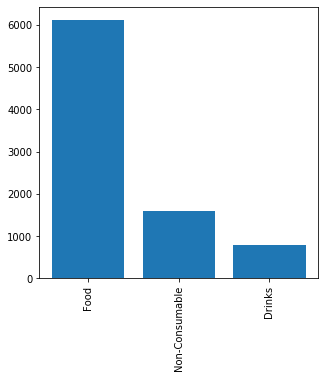

In [19]:
plt.figure(figsize=(5,5))
plt.xticks(rotation='vertical')
plt.bar(df['Item_Identifier'].value_counts().index, df['Item_Identifier'].value_counts())

<BarContainer object of 5 artists>

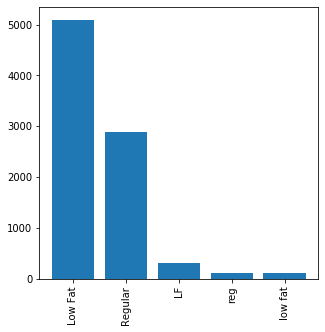

In [20]:
plt.figure(figsize=(5,5))
plt.xticks(rotation='vertical')
plt.bar(df['Item_Fat_Content'].value_counts().index, df['Item_Fat_Content'].value_counts())

<BarContainer object of 3 artists>

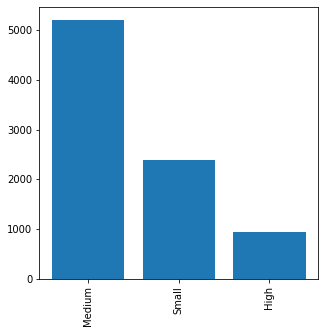

In [21]:
plt.figure(figsize=(5,5))
plt.xticks(rotation='vertical')
plt.bar(df['Outlet_Size'].value_counts().index, df['Outlet_Size'].value_counts())

<BarContainer object of 3 artists>

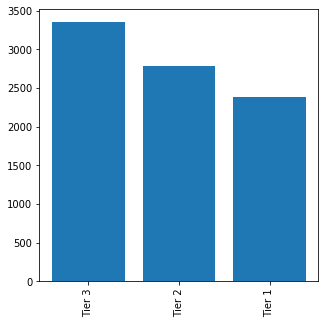

In [22]:
plt.figure(figsize=(5,5))
plt.xticks(rotation='vertical')
plt.bar(df['Outlet_Location_Type'].value_counts().index, df['Outlet_Location_Type'].value_counts())

<BarContainer object of 4 artists>

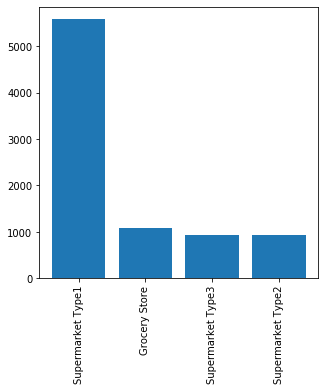

In [23]:
plt.figure(figsize=(5,5))
plt.xticks(rotation='vertical')
plt.bar(df['Outlet_Type'].value_counts().index, df['Outlet_Type'].value_counts())

In [24]:
df.shape

(8523, 12)

In [25]:
df2.shape

(5681, 11)

In [26]:
df_label = df.select_dtypes(include='object').apply(LabelEncoder().fit_transform)
df_label.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [27]:
df_label = df.select_dtypes(include='object').apply(LabelEncoder().fit_transform)
df.drop(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],axis=1, inplace=True)
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052


In [28]:
df2_label = df2.select_dtypes(include='object').apply(LabelEncoder().fit_transform)
df2.drop(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],axis=1, inplace=True)
df2.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,20.750000,0.007565,107.8622,1999
1,8.300000,0.038428,87.3198,2007
2,14.600000,0.099575,241.7538,1998
3,7.315000,0.015388,155.0340,2007
4,12.857645,0.118599,234.2300,1985


In [29]:
df = pd.concat([df, df_label], axis=1)
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,0.016047,249.8092,1999,3735.1380,1,1,4,9,1,0,1
1,5.92,0.019278,48.2692,2009,443.4228,0,2,14,3,1,2,2
2,17.50,0.016760,141.6180,1999,2097.2700,1,1,10,9,1,0,1
3,19.20,0.000000,182.0950,1998,732.3800,1,2,6,0,1,2,0
4,8.93,0.000000,53.8614,1987,994.7052,2,1,9,1,0,2,1


In [30]:
df2 = pd.concat([df2, df2_label], axis=1)
df2.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,0.007565,107.8622,1999,1,1,13,9,1,0,1
1,8.300000,0.038428,87.3198,2007,1,4,4,2,1,1,1
2,14.600000,0.099575,241.7538,1998,2,1,11,0,1,2,0
3,7.315000,0.015388,155.0340,2007,1,1,13,2,1,1,1
4,12.857645,0.118599,234.2300,1985,1,2,4,5,1,2,3


In [33]:
x=df.drop(['Item_Outlet_Sales'],axis=1)
y=df['Item_Outlet_Sales']

In [34]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x=sc_x.fit_transform(x)

x_test=sc_x.fit_transform(df2)

In [39]:
x


array([[-0.84187169, -0.97073217,  1.74745381, ..., -0.28458121,
        -1.36933384, -0.25265831],
       [-1.64170589, -0.90811123, -1.48902325, ..., -0.28458121,
         1.09156913,  1.00297245],
       [ 1.09855449, -0.95691733,  0.01004021, ..., -0.28458121,
        -1.36933384, -0.25265831],
       ...,
       [-0.53424315, -0.59978449, -0.89720755, ...,  1.38127431,
        -0.13888236, -0.25265831],
       [-1.33644372,  1.53287976, -0.60797692, ..., -0.28458121,
         1.09156913,  1.00297245],
       [ 0.45963367, -0.41193591, -1.05226104, ...,  1.38127431,
        -1.36933384, -0.25265831]])

In [38]:
x_test

array([[ 1.89070674, -1.13407715, -0.53655526, ..., -0.28473712,
        -1.369215  , -0.25276858],
       [-1.04197905, -0.53185019, -0.86893692, ..., -0.28473712,
        -0.1388274 , -0.25276858],
       [ 0.44203063,  0.6613164 ,  1.62984753, ..., -0.28473712,
         1.0915602 , -1.50799439],
       ...,
       [-0.64153199,  0.15307374, -0.36048475, ..., -0.28473712,
        -0.1388274 , -0.25276858],
       [ 0.60692059, -1.28168987,  1.19084433, ..., -0.28473712,
        -0.1388274 , -0.25276858],
       [-0.75931054,  0.76171558, -0.99067406, ..., -0.28473712,
        -0.1388274 , -0.25276858]])

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.1,random_state=42)

In [41]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
predictions=lm.predict(x_val)

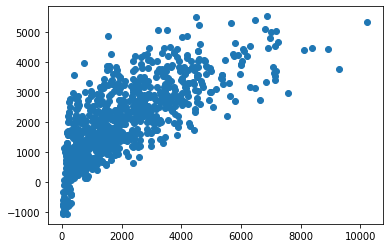

In [43]:
plt.scatter(y_val,predictions)

In [44]:
import numpy as np
from sklearn import metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_val,predictions))
print('Mean Squared Error: ',metrics.mean_squared_error(y_val,predictions))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_val,predictions)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_val,predictions))

Mean Absolute Error:  854.2685952852594
Mean Squared Error:  1309582.0667504275
Root Mean Squared Error:  1144.3697246739916
Explained Variance Score:  0.531632124750346


In [45]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=400,max_depth=6, min_samples_leaf=76,n_jobs=4)
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=76,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=400, n_jobs=4, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [46]:
predictions1=rf.predict(x_val)

In [55]:
import numpy as np
from sklearn import metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_val,predictions1))
print('Mean Squared Error: ',metrics.mean_squared_error(y_val,predictions1))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_val,predictions1)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_val,predictions1))

Mean Absolute Error:  720.8464144918352
Mean Squared Error:  1057420.3444902587
Root Mean Squared Error:  1028.3094594966335
Explained Variance Score:  0.6217930412122326


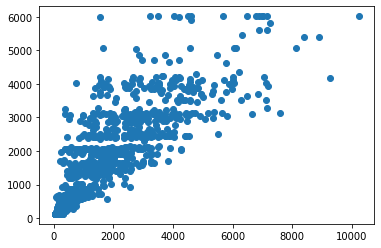

In [47]:
plt.scatter(y_val,predictions1)

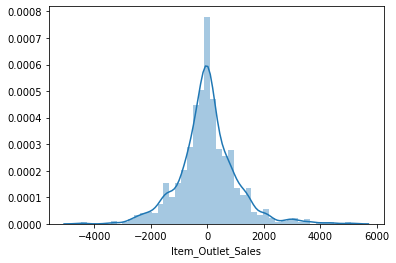

In [48]:
import seaborn as sns
sns.distplot((y_val-predictions1))

In [49]:
import xgboost as xgb
data_dmatrix = xgb.DMatrix(data=x,label=y)
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', 
                          learning_rate =0.1,
                          n_estimators=41,
                          max_depth=3,
                          min_child_weight=5,
                          gamma=0,
                          subsample=0.75,
                          colsample_bytree=0.95,
                          nthread=4,
                          scale_pos_weight=1,
                          reg_alpha=0.021,
                          seed=42,
                          )
xg_reg.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.95, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=5, missing=nan, monotone_constraints='()',
             n_estimators=41, n_jobs=4, nthread=4, num_parallel_tree=1,
             objective='reg:squarederror', random_state=42, reg_alpha=0.021,
             reg_lambda=1, scale_pos_weight=1, seed=42, subsample=0.75,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [50]:
predictions2 = xg_reg.predict(x_val)

In [51]:
import numpy as np
from sklearn import metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_val,predictions2))
print('Mean Squared Error: ',metrics.mean_squared_error(y_val,predictions2))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_val,predictions2)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_val,predictions2))


Mean Absolute Error:  719.6328842430239
Mean Squared Error:  1058126.3734292076
Root Mean Squared Error:  1028.6526981587165
Explained Variance Score:  0.6218523261254498


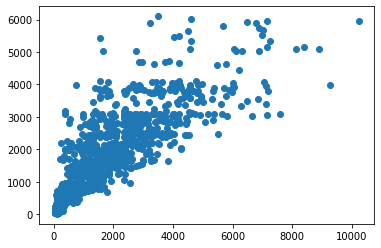

In [52]:
plt.scatter(y_val,predictions2)

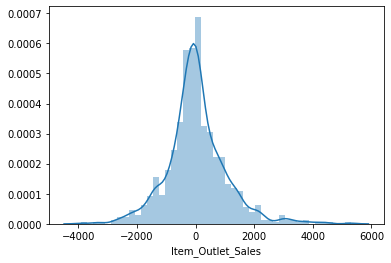

In [54]:
import seaborn as sns
sns.distplot((y_val-predictions2))